In [ ]:
#i) Image Inpainting


# !pip install opencv-python-headless matplotlib


import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Upload your image
uploaded = files.upload()
img_path = next(iter(uploaded))
image = cv2.imread("/content/IInpainting.png")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Simulate damage by drawing white boxes
mask = np.zeros(image.shape[:2], np.uint8)
mask[100:200, 150:300] = 255
mask[250:300, 100:180] = 255

damaged = image.copy()
damaged[mask == 255] = 255  # Draw white on mask area

# Step 5: Inpainting using OpenCV
inpainted_telea = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_TELEA)
inpainted_ns = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_NS)

# Step 6: Display results
plt.figure(figsize=(14, 6))
titles = ["Original", "Damaged", "Inpainted (Telea)", "Inpainted (NS)"]
images = [image, damaged, inpainted_telea, inpainted_ns]

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'google.colab'

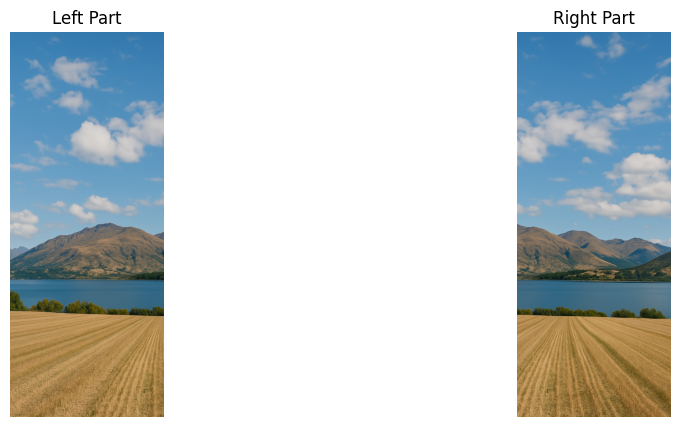

Image stitching successful!


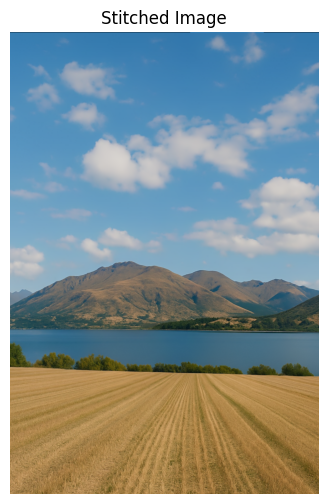

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the full image
img = cv2.imread('/content/IS.png')  # Replace with your actual path

# Define overlap
height, width, _ = img.shape
overlap = 100  # pixels

# Create left and right images with overlap
left_img = img[:, :width//2 + overlap]
right_img = img[:, width//2 - overlap:]

# Save for stitching
cv2.imwrite("left_part.jpg", left_img)
cv2.imwrite("right_part.jpg", right_img)

# Display the two parts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB))
plt.title("Left Part")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB))
plt.title("Right Part")
plt.axis('off')
plt.show()

# Stitch the two parts back together
# Reload to ensure clean processing
left_img = cv2.imread("left_part.jpg")
right_img = cv2.imread("right_part.jpg")

# Use OpenCV's Stitcher
stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch([left_img, right_img])

# Show stitched result
if status == cv2.Stitcher_OK:
    print("Image stitching successful!")
    stitched_rgb = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 6))
    plt.imshow(stitched_rgb)
    plt.axis('off')
    plt.title("Stitched Image")
    plt.show()
else:
    print("Image stitching failed. Status code:", status)


Rotation Matrix (R):
 [[ 0.13373706  0.30129007  0.94410735]
 [ 0.37788168  0.86518644 -0.32963292]
 [-0.916144    0.40084501  0.00185549]]

Translation Vector (t):
 [[-3.30503896e-01]
 [-9.43804176e-01]
 [-9.23131151e-04]]


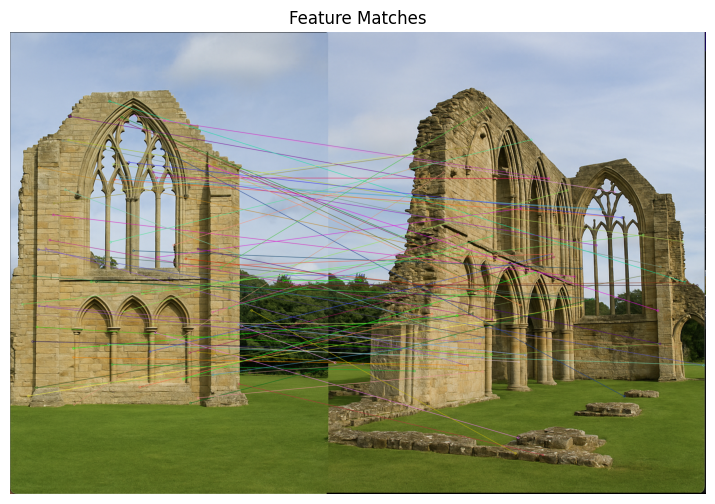

In [ ]:
#iii) SFM

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load input images
img1 = cv2.imread('/content/SFM left.png')
img2 = cv2.imread('/content/SFM right.png')

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Step 1: Detect features and compute descriptors using SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Step 2: Match features using FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Lowe's ratio test
good_matches = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Step 3: Find Fundamental Matrix
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

# Step 4: Assume identity camera intrinsics (replace with real K if available)
K = np.eye(3)

# Step 5: Compute Essential Matrix
E = K.T @ F @ K

# Step 6: Recover Pose (Rotation and Translation)
_, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)

# Print R and t
print("Rotation Matrix (R):\n", R)
print("\nTranslation Vector (t):\n", t)

# Step 7: Draw good matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                               flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert to RGB for matplotlib
matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Show result
plt.figure(figsize=(15, 6))
plt.imshow(matched_img)
plt.title("Feature Matches")
plt.axis('off')
plt.show()


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 2, 2, 256)      │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 4, 4, 128)      │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 8, 8, 64)       │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,367,425 (5.22 MB)

 Trainable params: 1,366,465 (5.21 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - loss: 0.0255 - val_loss: 0.0467
Epoch 2/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0149 - val_loss: 0.0175
Epoch 3/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0129 - val_loss: 0.0136
Epoch 4/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0119 - val_loss: 0.0136
Epoch 5/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0111 - val_loss: 0.0134
Epoch 6/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0105 - val_loss: 0.0123
Epoch 7/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0101 - val_loss: 0.0109
Epoch 8/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0099 - val_loss: 0.0114
Epoch 9/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0095 - val_loss: 0.0117
Epoch 10/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0092 - val_loss: 0.0104
Epoch 11/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0089 - val_loss: 0.0104
Epoch 12/300
391/391 ━━━━━

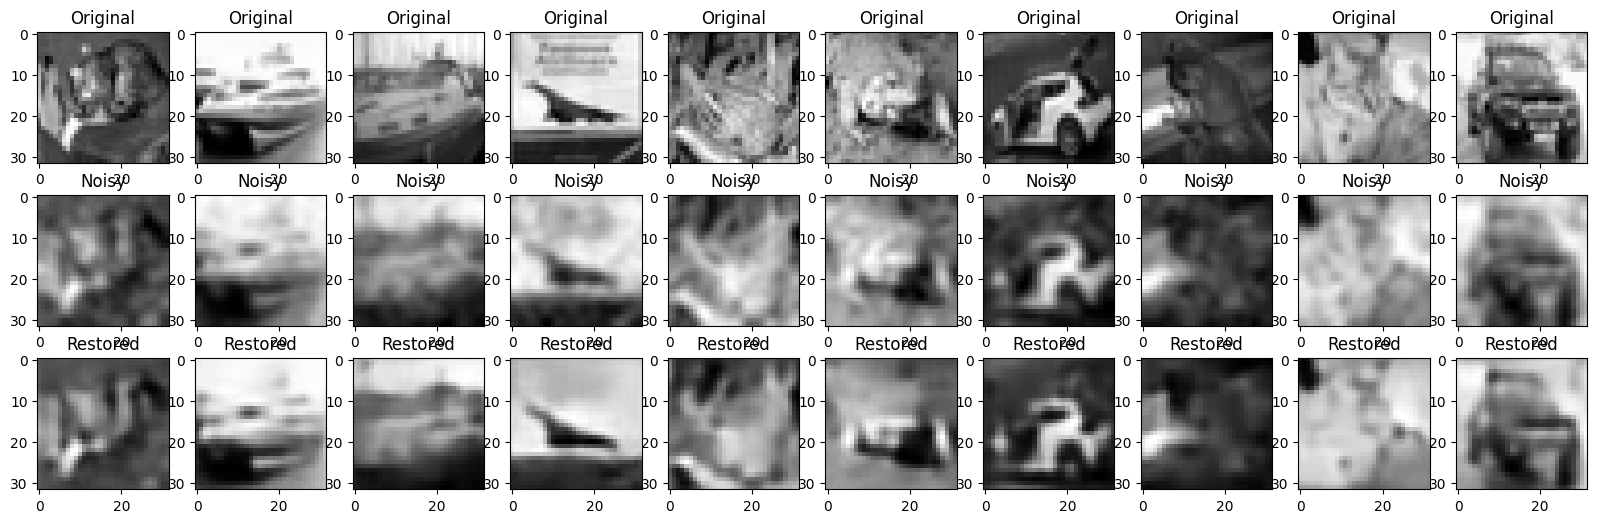

PSNR values:
22.73066
22.865623
24.198975
24.169031
22.735786
25.0603
22.645254
26.534729
24.197578
22.453796


In [ ]:
# Task 2 - Image Restoration using Autoencoder Model
# Step 1: Install necessary libraries

%pip install tensorflow==2.11  # TensorFlow version 2.11 (adjust as necessary)
%pip install opencv-python-headless  # Use opencv-python-headless for compatibility in Google Colab

# Step 2: Import necessary libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Step 3: Load CIFAR-10 dataset and preprocess it

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert to grayscale
x_train_gray = np.mean(x_train, axis=-1, keepdims=True)  # Convert to grayscale
x_test_gray = np.mean(x_test, axis=-1, keepdims=True)  # Convert to grayscale

# Add noise and blur to the images
def add_noise(img):
    noise = np.random.normal(0, 0.1, img.shape)  # Gaussian noise
    return np.clip(img + noise, 0., 1.)

def add_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

# Add noise and blur to the images
x_train_noisy = np.array([add_blur(add_noise(img)) for img in x_train_gray])
x_test_noisy = np.array([add_blur(add_noise(img)) for img in x_test_gray])

# Step 4: Define the enhanced Autoencoder model with deeper architecture

def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    # Increase filter size and depth
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Deeper model with more features
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

    return autoencoder

# Step 5: Build and summarize the model
autoencoder = build_autoencoder()
autoencoder.summary()

# Step 6: Train the model
autoencoder.fit(x_train_noisy, x_train_gray, epochs=300, batch_size=128, validation_data=(x_test_noisy, x_test_gray))

# Step 7: Predict restored images
restored_images = autoencoder.predict(x_test_noisy)

# Step 8: Plot original, noisy, and restored images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_gray[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Original')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Noisy')

    # Restored images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(restored_images[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Restored')

plt.show()

# Step 9: Calculate PSNR values
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

# Calculate PSNR for a few test images
psnr_values = [psnr(x_test_gray[i], restored_images[i]) for i in range(n)]

# Print PSNR values in a vertical manner
print("PSNR values:")
for value in psnr_values:
    print(value.numpy())  # Convert tensor to a NumPy array to get the value


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/mobilenet-v2-dog-classification")

print("Path to dataset files:", path)

100%|██████████| 14.7M/14.7M [00:01<00:00, 8.32MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gauravduttakiit/mobilenet-v2-dog-classification/versions/1


Oxford-IIIT Pet Dataset not found at data/oxford_pets
Please download the dataset from: https://www.robots.ox.ac.uk/~vgg/data/pets/
Or from Kaggle: https://www.kaggle.com/datasets/devdgohil/the-oxfordiiit-pet-dataset
After downloading, extract it to the 'data/oxford_pets' directory

Creating a synthetic dataset for demonstration...
Training data: 16 images
Validation data: 4 images
Model summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 128) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 256) │    295,168 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8, 256) │    590,080 │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 16, 16,    │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 384)              │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,962,625 (7.49 MB)

 Trainable params: 1,962,625 (7.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.6165 - dice_coef: 5.3855e-04 - iou_metric: 2.6944e-04 - loss: 0.7581
Epoch 1: val_dice_coef improved from -inf to 0.02095, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.6165 - dice_coef: 5.3855e-04 - iou_metric: 2.6944e-04 - loss: 0.7581 - val_accuracy: 0.8077 - val_dice_coef: 0.0210 - val_iou_metric: 0.0106 - val_loss: 0.6222
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8316 - dice_coef: 0.0245 - iou_metric: 0.0124 - loss: 0.6182
Epoch 2: val_dice_coef improved from 0.02095 to 0.07826, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8316 - dice_coef: 0.0245 - iou_metric: 0.0124 - loss: 0.6182 - val_accuracy: 0.8398 - val_dice_coef: 0.0783 - val_iou_metric: 0.0408 - val_loss: 0.5326
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.8679 - dice_coef: 0.0872 - iou_metric: 0.0458 - loss: 0.5326
Epoch 3: val_dice_coef improved from 0.07826 to 0.33469, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 0.8679 - dice_coef: 0.0872 - iou_metric: 0.0458 - loss: 0.5326 - val_accuracy: 0.8711 - val_dice_coef: 0.3347 - val_iou_metric: 0.2032 - val_loss: 0.4551
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8982 - dice_coef: 0.3718 - iou_metric: 0.2318 - loss: 0.4568
Epoch 4: val_dice_coef improved from 0.33469 to 0.59126, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.8982 - dice_coef: 0.3718 - iou_metric: 0.2318 - loss: 0.4568 - val_accuracy: 0.9077 - val_dice_coef: 0.5913 - val_iou_metric: 0.4277 - val_loss: 0.3810
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9297 - dice_coef: 0.6368 - iou_metric: 0.4751 - loss: 0.3836
Epoch 5: val_dice_coef improved from 0.59126 to 0.78202, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.9297 - dice_coef: 0.6368 - iou_metric: 0.4751 - loss: 0.3836 - val_accuracy: 0.9430 - val_dice_coef: 0.7820 - val_iou_metric: 0.6471 - val_loss: 0.3083
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9531 - dice_coef: 0.7816 - iou_metric: 0.6443 - loss: 0.3135
Epoch 6: val_dice_coef improved from 0.78202 to 0.87004, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9531 - dice_coef: 0.7816 - iou_metric: 0.6443 - loss: 0.3135 - val_accuracy: 0.9645 - val_dice_coef: 0.8700 - val_iou_metric: 0.7702 - val_loss: 0.2414
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9693 - dice_coef: 0.8602 - iou_metric: 0.7550 - loss: 0.2504
Epoch 7: val_dice_coef improved from 0.87004 to 0.91457, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9693 - dice_coef: 0.8602 - iou_metric: 0.7550 - loss: 0.2504 - val_accuracy: 0.9761 - val_dice_coef: 0.9146 - val_iou_metric: 0.8428 - val_loss: 0.1871
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9789 - dice_coef: 0.9077 - iou_metric: 0.8312 - loss: 0.1985
Epoch 8: val_dice_coef improved from 0.91457 to 0.93726, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9789 - dice_coef: 0.9077 - iou_metric: 0.8312 - loss: 0.1985 - val_accuracy: 0.9820 - val_dice_coef: 0.9373 - val_iou_metric: 0.8820 - val_loss: 0.1448
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9855 - dice_coef: 0.9379 - iou_metric: 0.8832 - loss: 0.1569
Epoch 9: val_dice_coef improved from 0.93726 to 0.94091, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9855 - dice_coef: 0.9379 - iou_metric: 0.8832 - loss: 0.1569 - val_accuracy: 0.9830 - val_dice_coef: 0.9409 - val_iou_metric: 0.8885 - val_loss: 0.1138
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9871 - dice_coef: 0.9439 - iou_metric: 0.8940 - loss: 0.1250
Epoch 10: val_dice_coef improved from 0.94091 to 0.94842, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9871 - dice_coef: 0.9439 - iou_metric: 0.8940 - loss: 0.1250 - val_accuracy: 0.9852 - val_dice_coef: 0.9484 - val_iou_metric: 0.9021 - val_loss: 0.0898
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9877 - dice_coef: 0.9461 - iou_metric: 0.8980 - loss: 0.1005
Epoch 11: val_dice_coef improved from 0.94842 to 0.95563, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.9877 - dice_coef: 0.9461 - iou_metric: 0.8980 - loss: 0.1005 - val_accuracy: 0.9872 - val_dice_coef: 0.9556 - val_iou_metric: 0.9152 - val_loss: 0.0715
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9883 - dice_coef: 0.9486 - iou_metric: 0.9025 - loss: 0.0820
Epoch 12: val_dice_coef improved from 0.95563 to 0.95823, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step - accuracy: 0.9883 - dice_coef: 0.9486 - iou_metric: 0.9025 - loss: 0.0820 - val_accuracy: 0.9879 - val_dice_coef: 0.9582 - val_iou_metric: 0.9199 - val_loss: 0.0590
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9891 - dice_coef: 0.9521 - iou_metric: 0.9090 - loss: 0.0684
Epoch 13: val_dice_coef improved from 0.95823 to 0.95920, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.9891 - dice_coef: 0.9521 - iou_metric: 0.9090 - loss: 0.0684 - val_accuracy: 0.9882 - val_dice_coef: 0.9592 - val_iou_metric: 0.9217 - val_loss: 0.0502
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9893 - dice_coef: 0.9527 - iou_metric: 0.9102 - loss: 0.0589
Epoch 14: val_dice_coef did not improve from 0.95920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9893 - dice_coef: 0.9527 - iou_metric: 0.9102 - loss: 0.0589 - val_accuracy: 0.9882 - val_dice_coef: 0.9591 - val_iou_metric: 0.9215 - val_loss: 0.0458
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9893 - dice_coef: 0.9530 - iou_metric: 0.9107 - loss: 0.0523
Epoch 15: val_dice_coef improved from 0.95920 to 0.95988, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9893 - dice_coef: 0.9530 - iou_metric: 0.9107 - loss: 0.0523 - val_accuracy: 0.9885 - val_dice_coef: 0.9599 - val_iou_metric: 0.9230 - val_loss: 0.0419
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9897 - dice_coef: 0.9543 - iou_metric: 0.9130 - loss: 0.0465
Epoch 16: val_dice_coef did not improve from 0.95988
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9897 - dice_coef: 0.9543 - iou_metric: 0.9130 - loss: 0.0465 - val_accuracy: 0.9884 - val_dice_coef: 0.9597 - val_iou_metric: 0.9227 - val_loss: 0.0397
Epoch 17/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9900 - dice_coef: 0.9545 - iou_metric: 0.9136 - loss: 0.0421
Epoch 17: val_dice_coef improved from 0.95988 to 0.96234, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.9900 - dice_coef: 0.9545 - iou_metric: 0.9136 - loss: 0.0421 - val_accuracy: 0.9893 - val_dice_coef: 0.9623 - val_iou_metric: 0.9277 - val_loss: 0.0363
Epoch 18/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9899 - dice_coef: 0.9541 - iou_metric: 0.9127 - loss: 0.0390
Epoch 18: val_dice_coef did not improve from 0.96234
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9899 - dice_coef: 0.9541 - iou_metric: 0.9127 - loss: 0.0390 - val_accuracy: 0.9866 - val_dice_coef: 0.9537 - val_iou_metric: 0.9116 - val_loss: 0.0445
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9907 - dice_coef: 0.9592 - iou_metric: 0.9218 - loss: 0.0385
Epoch 19: val_dice_coef did not improve from 0.96234
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.9907 - dice_coef: 0.9592 - iou_metric: 0.9218 - loss: 0.0385 - val_accuracy: 0.9773 - val_dice_coef: 0.9279 - val_iou_metric: 0.8656 - val_loss: 0.0699
Epoch 20/50
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9921 - dice_coef: 0.9658 - iou_metric: 0.9341 - loss: 0.0291 - val_accuracy: 0.9900 - val_dice_coef: 0.9663 - val_iou_metric: 0.9349 - val_loss: 0.0247
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9903 - dice_coef: 0.9570 - iou_metric: 0.9179 - loss: 0.0263
Epoch 27: val_dice_coef did not improve from 0.96631
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.9903 - dice_coef: 0.9570 - iou_metric: 0.9179 - loss: 0.0263 - val_accuracy: 0.9879 - val_dice_coef: 0.9595 - val_iou_metric: 0.9223 - val_loss: 0.0273
Epoch 28/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9892 - dice_coef: 0.9526 - iou_metric: 0.9100 - loss: 0.0290
Epoch 28: val_dice_coef improved from 0.96631 to 0.97695, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9892 - dice_coef: 0.9526 - iou_metric: 0.9100 - loss: 0.0290 - val_accuracy: 0.9933 - val_dice_coef: 0.9769 - val_iou_metric: 0.9550 - val_loss: 0.0234
Epoch 29/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9947 - dice_coef: 0.9758 - iou_metric: 0.9529 - loss: 0.0196
Epoch 29: val_dice_coef did not improve from 0.97695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9947 - dice_coef: 0.9758 - iou_metric: 0.9529 - loss: 0.0196 - val_accuracy: 0.9866 - val_dice_coef: 0.9531 - val_iou_metric: 0.9107 - val_loss: 0.0397
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9916 - dice_coef: 0.9641 - iou_metric: 0.9307 - loss: 0.0274
Epoch 30: val_dice_coef did not improve from 0.97695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9916 - dice_coef: 0.9641 - iou_metric: 0.9307 - loss: 0.0274 - val_accuracy: 0.9930 - val_dice_coef: 0.9758 - val_iou_metric: 0.9529 - val_loss: 0.0229
Epoch 31/50
1/1 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9942 - dice_coef: 0.9744 - iou_metric: 0.9501 - loss: 0.0196 - val_accuracy: 0.9938 - val_dice_coef: 0.9783 - val_iou_metric: 0.9577 - val_loss: 0.0196
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9966 - dice_coef: 0.9846 - iou_metric: 0.9698 - loss: 0.0146
Epoch 36: val_dice_coef improved from 0.97827 to 0.98008, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.9966 - dice_coef: 0.9846 - iou_metric: 0.9698 - loss: 0.0146 - val_accuracy: 0.9941 - val_dice_coef: 0.9801 - val_iou_metric: 0.9610 - val_loss: 0.0171
Epoch 37/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.9943 - dice_coef: 0.9745 - iou_metric: 0.9505 - loss: 0.0159
Epoch 37: val_dice_coef did not improve from 0.98008
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9943 - dice_coef: 0.9745 - iou_metric: 0.9505 - loss: 0.0159 - val_accuracy: 0.9940 - val_dice_coef: 0.9797 - val_iou_metric: 0.9603 - val_loss: 0.0169
Epoch 38/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9943 - dice_coef: 0.9744 - iou_metric: 0.9503 - loss: 0.0159
Epoch 38: val_dice_coef improved from 0.98008 to 0.98058, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9943 - dice_coef: 0.9744 - iou_metric: 0.9503 - loss: 0.0159 - val_accuracy: 0.9945 - val_dice_coef: 0.9806 - val_iou_metric: 0.9620 - val_loss: 0.0169
Epoch 39/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9965 - dice_coef: 0.9840 - iou_metric: 0.9687 - loss: 0.0133
Epoch 39: val_dice_coef did not improve from 0.98058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9965 - dice_coef: 0.9840 - iou_metric: 0.9687 - loss: 0.0133 - val_accuracy: 0.9915 - val_dice_coef: 0.9704 - val_iou_metric: 0.9428 - val_loss: 0.0220
Epoch 40/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9957 - dice_coef: 0.9814 - iou_metric: 0.9634 - loss: 0.0152
Epoch 40: val_dice_coef did not improve from 0.98058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.9957 - dice_coef: 0.9814 - iou_metric: 0.9634 - loss: 0.0152 - val_accuracy: 0.9940 - val_dice_coef: 0.9791 - val_iou_metric: 0.9592 - val_loss: 0.0179
Epoch 41/50
1/1 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.9970 - dice_coef: 0.9865 - iou_metric: 0.9734 - loss: 0.0127 - val_accuracy: 0.9948 - val_dice_coef: 0.9823 - val_iou_metric: 0.9653 - val_loss: 0.0151
Epoch 42/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9962 - dice_coef: 0.9830 - iou_metric: 0.9667 - loss: 0.0125
Epoch 42: val_dice_coef did not improve from 0.98229
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9962 - dice_coef: 0.9830 - iou_metric: 0.9667 - loss: 0.0125 - val_accuracy: 0.9937 - val_dice_coef: 0.9789 - val_iou_metric: 0.9588 - val_loss: 0.0157
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9954 - dice_coef: 0.9797 - iou_metric: 0.9603 - loss: 0.0132
Epoch 43: val_dice_coef did not improve from 0.98229
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.9954 - dice_coef: 0.9797 - iou_metric: 0.9603 - loss: 0.0132 - val_accuracy: 0.9946 - val_dice_coef: 0.9815 - val_iou_metric: 0.9638 - val_loss: 0.0155
Epoch 44/50
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9975 - dice_coef: 0.9888 - iou_metric: 0.9779 - loss: 0.0111 - val_accuracy: 0.9954 - val_dice_coef: 0.9841 - val_iou_metric: 0.9688 - val_loss: 0.0136
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9972 - dice_coef: 0.9872 - iou_metric: 0.9749 - loss: 0.0104
Epoch 47: val_dice_coef did not improve from 0.98407
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9972 - dice_coef: 0.9872 - iou_metric: 0.9749 - loss: 0.0104 - val_accuracy: 0.9949 - val_dice_coef: 0.9826 - val_iou_metric: 0.9659 - val_loss: 0.0135
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9962 - dice_coef: 0.9830 - iou_metric: 0.9666 - loss: 0.0111
Epoch 48: val_dice_coef improved from 0.98407 to 0.98527, saving model to models/unet_segmentation.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9962 - dice_coef: 0.9830 - iou_metric: 0.9666 - loss: 0.0111 - val_accuracy: 0.9957 - val_dice_coef: 0.9853 - val_iou_metric: 0.9710 - val_loss: 0.0132
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9974 - dice_coef: 0.9880 - iou_metric: 0.9764 - loss: 0.0099
Epoch 49: val_dice_coef did not improve from 0.98527
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9974 - dice_coef: 0.9880 - iou_metric: 0.9764 - loss: 0.0099 - val_accuracy: 0.9947 - val_dice_coef: 0.9815 - val_iou_metric: 0.9639 - val_loss: 0.0150
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9978 - dice_coef: 0.9900 - iou_metric: 0.9802 - loss: 0.0100
Epoch 50: val_dice_coef did not improve from 0.98527
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.9978 - dice_coef: 0.9900 - iou_metric: 0.9802 - loss: 0.0100 - val_accuracy: 0.9949 - val_dice_coef: 0.9823 - val_iou_metric: 0.9654 - val_loss: 0.0147
Restoring model weights from

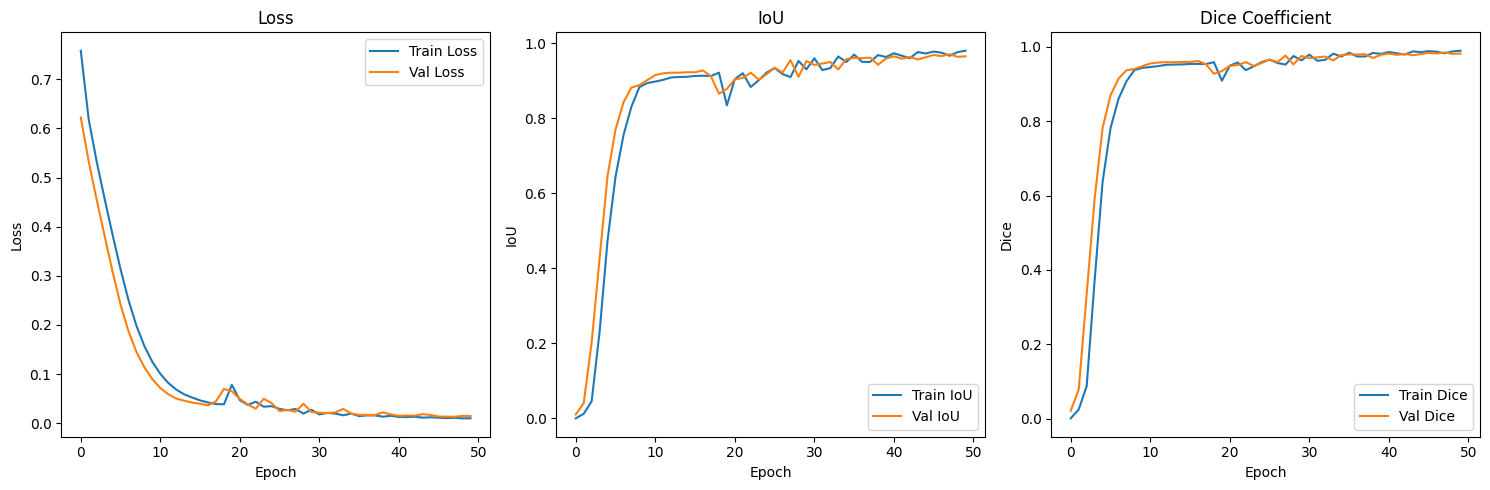

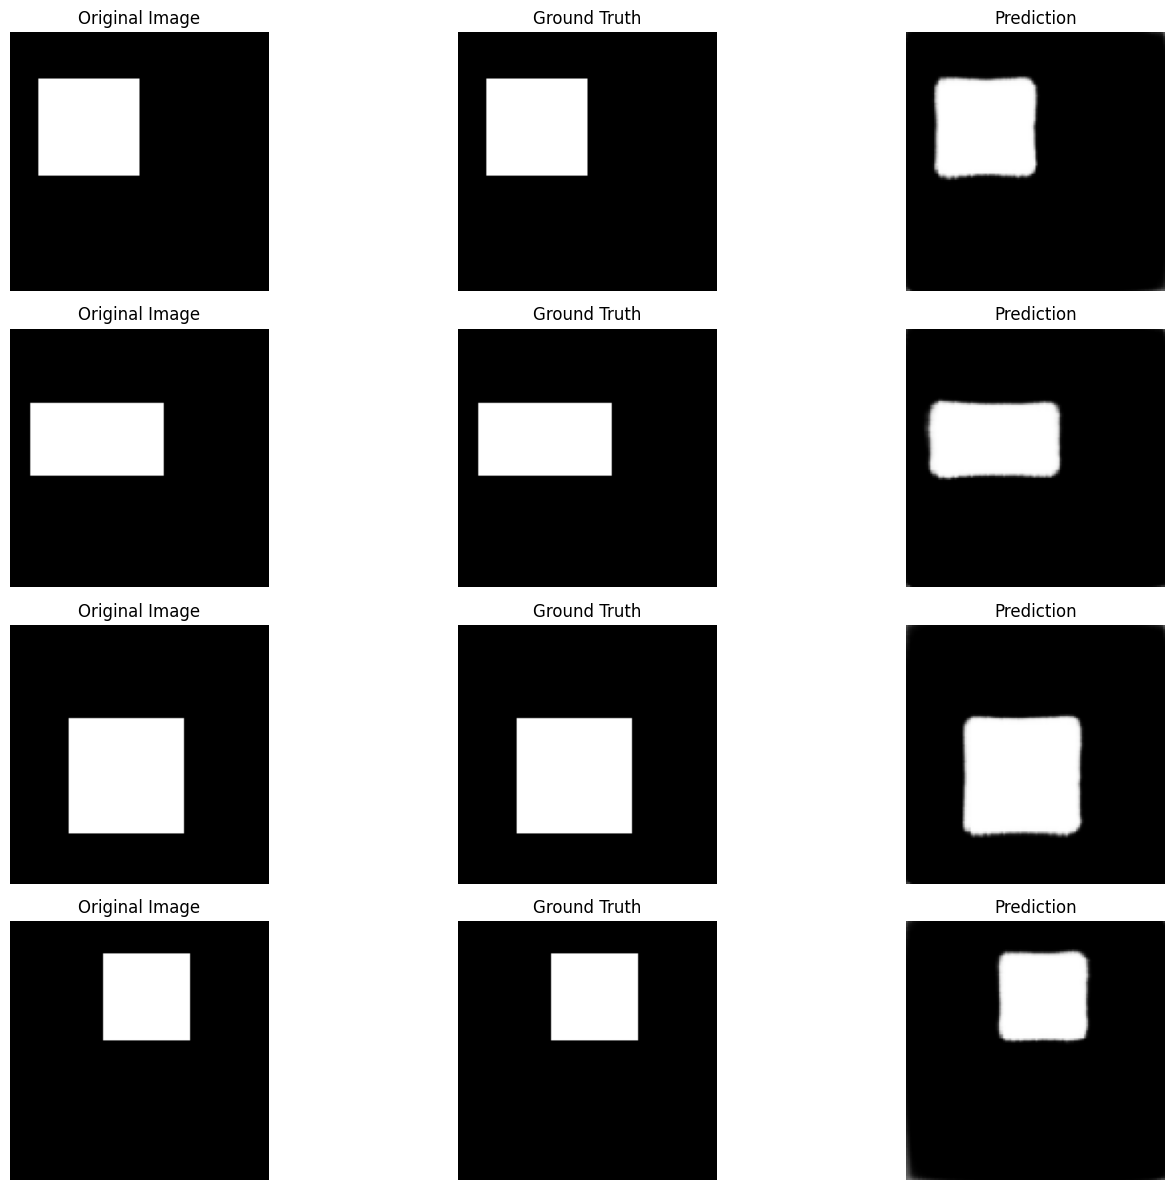

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import glob
from PIL import Image
from sklearn.model_selection import train_test_split

# Define parameters
img_height, img_width = 128, 128  # Reduced size for faster training
batch_size = 16
epochs = 50
seed = 42

# Create directories if they don't exist
def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

create_dir('models')
create_dir('results')
create_dir('data')

# Download the Oxford-IIIT Pet Dataset if it doesn't exist
dataset_path = "data/oxford_pets"
create_dir(dataset_path)

# Check if dataset exists (look for a specific directory structure)
if not os.path.exists(os.path.join(dataset_path, 'images')) or not os.path.exists(os.path.join(dataset_path, 'annotations')):
    print(f"Oxford-IIIT Pet Dataset not found at {dataset_path}")
    print("Please download the dataset from: https://www.robots.ox.ac.uk/~vgg/data/pets/")
    print("Or from Kaggle: https://www.kaggle.com/datasets/devdgohil/the-oxfordiiit-pet-dataset")
    print("After downloading, extract it to the 'data/oxford_pets' directory")

    # For demonstration, we'll create a very small synthetic dataset
    print("\nCreating a synthetic dataset for demonstration...")
    synthetic_data_path = "data/synthetic"
    create_dir(os.path.join(synthetic_data_path, 'images'))
    create_dir(os.path.join(synthetic_data_path, 'masks'))

    # Create 20 synthetic images and masks (black and white shapes)
    for i in range(20):
        # Create a black image with a white rectangle
        img = np.zeros((128, 128, 3), dtype=np.uint8)
        mask = np.zeros((128, 128), dtype=np.uint8)

        # Random rectangle position and size
        x1, y1 = np.random.randint(10, 50, size=2)
        x2, y2 = x1 + np.random.randint(30, 70), y1 + np.random.randint(30, 70)

        # Draw rectangle on image and mask
        img[y1:y2, x1:x2] = 255
        mask[y1:y2, x1:x2] = 1

        # Save the image and mask
        Image.fromarray(img).save(os.path.join(synthetic_data_path, 'images', f'img_{i}.png'))
        Image.fromarray(mask * 255).save(os.path.join(synthetic_data_path, 'masks', f'mask_{i}.png'))

    dataset_path = synthetic_data_path

# Function to load and preprocess data
def load_data(dataset_path):
    """Load images and masks from the dataset"""

    if "oxford_pets" in dataset_path:
        # Load the Oxford-IIIT Pet Dataset
        images_path = os.path.join(dataset_path, 'images')
        masks_path = os.path.join(dataset_path, 'annotations', 'trimaps')

        # Get all image files
        image_files = sorted(glob.glob(os.path.join(images_path, '*.jpg')))
        mask_files = sorted(glob.glob(os.path.join(masks_path, '*.png')))

        # Make sure we have the same number of images and masks
        assert len(image_files) == len(mask_files), "Number of images and masks don't match"

        # Split into train and validation sets
        train_img_files, val_img_files, train_mask_files, val_mask_files = train_test_split(
            image_files, mask_files, test_size=0.2, random_state=seed)

        # Load and preprocess the images and masks
        def preprocess_data(img_files, mask_files):
            X = []
            Y = []

            for img_path, mask_path in zip(img_files, mask_files):
                # Load image
                img = Image.open(img_path).resize((img_width, img_height))
                img = np.array(img) / 255.0  # Normalize to [0, 1]

                # Load mask (trimap: 1=foreground, 2=border, 3=background)
                mask = Image.open(mask_path).resize((img_width, img_height))
                mask = np.array(mask)

                # Convert trimap to binary mask (1=foreground, 0=background+border)
                binary_mask = np.zeros_like(mask)
                binary_mask[mask == 1] = 1
                binary_mask = binary_mask.astype(np.float32)

                X.append(img)
                Y.append(binary_mask)

            return np.array(X), np.expand_dims(np.array(Y), axis=-1)

        X_train, Y_train = preprocess_data(train_img_files[:100], train_mask_files[:100])  # Limit for speed
        X_val, Y_val = preprocess_data(val_img_files[:20], val_mask_files[:20])  # Limit for speed

    else:
        # Load the synthetic dataset
        images_path = os.path.join(dataset_path, 'images')
        masks_path = os.path.join(dataset_path, 'masks')

        # Get all image files
        image_files = sorted(glob.glob(os.path.join(images_path, '*.png')))
        mask_files = sorted(glob.glob(os.path.join(masks_path, '*.png')))

        # Split into train and validation sets
        train_img_files, val_img_files, train_mask_files, val_mask_files = train_test_split(
            image_files, mask_files, test_size=0.2, random_state=seed)

        # Load and preprocess the images and masks
        def preprocess_data(img_files, mask_files):
            X = []
            Y = []

            for img_path, mask_path in zip(img_files, mask_files):
                # Load image
                img = Image.open(img_path).resize((img_width, img_height))
                img = np.array(img) / 255.0  # Normalize to [0, 1]

                # Load mask
                mask = Image.open(mask_path).resize((img_width, img_height))
                mask = np.array(mask) / 255.0  # Normalize to [0, 1]

                X.append(img)
                Y.append(mask)

            return np.array(X), np.expand_dims(np.array(Y), axis=-1)

        X_train, Y_train = preprocess_data(train_img_files, train_mask_files)
        X_val, Y_val = preprocess_data(val_img_files, val_mask_files)

    print(f"Training data: {len(X_train)} images")
    print(f"Validation data: {len(X_val)} images")

    return X_train, Y_train, X_val, Y_val

# Load the data
X_train, Y_train, X_val, Y_val = load_data(dataset_path)

# Function to build the U-Net model
def build_unet(input_shape):
    inputs = Input(input_shape)

    # Encoder (Contracting Path)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bridge
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Decoder (Expansive Path)
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    # Output layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Function to calculate IoU (Intersection over Union)
def iou_metric(y_true, y_pred):
    """Calculate IoU metric for binary segmentation"""
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3]) - intersection

    # Add a small epsilon to avoid division by zero
    iou = (intersection + 1e-7) / (union + 1e-7)
    return tf.reduce_mean(iou)

# Function to calculate Dice coefficient
def dice_coef(y_true, y_pred):
    """Calculate Dice coefficient for binary segmentation"""
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])

    # Add a small epsilon to avoid division by zero
    dice = (2. * intersection + 1e-7) / (union + 1e-7)
    return tf.reduce_mean(dice)

# Build the model
input_shape = (img_height, img_width, 3)
model = build_unet(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', iou_metric, dice_coef])

print("Model summary:")
model.summary()

# Define callbacks
checkpoint = ModelCheckpoint(
    'models/unet_segmentation.h5',
    monitor='val_dice_coef',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_dice_coef',
    patience=10,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

# Train the model
start_time = time.time()

history = model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, Y_val),
    callbacks=[checkpoint, early_stopping]
)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot IoU
plt.subplot(1, 3, 2)
plt.plot(history.history['iou_metric'], label='Train IoU')
plt.plot(history.history['val_iou_metric'], label='Val IoU')
plt.title('IoU')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.legend()

# Plot Dice coefficient
plt.subplot(1, 3, 3)
plt.plot(history.history['dice_coef'], label='Train Dice')
plt.plot(history.history['val_dice_coef'], label='Val Dice')
plt.title('Dice Coefficient')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.legend()

plt.tight_layout()
plt.savefig('results/unet_training_history.png')

# Evaluate the model on validation set
val_loss, val_acc, val_iou, val_dice = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation IoU: {val_iou:.4f}")
print(f"Validation Dice Coefficient: {val_dice:.4f}")

# Make predictions on some validation samples
num_samples = min(10, len(X_val))
predictions = model.predict(X_val[:num_samples])

# Plot the results
plt.figure(figsize=(15, 12))
for i in range(num_samples):
    # Original image
    plt.subplot(num_samples, 3, i*3+1)
    plt.imshow(X_val[i])
    plt.title('Original Image')
    plt.axis('off')

    # Ground truth mask
    plt.subplot(num_samples, 3, i*3+2)
    plt.imshow(Y_val[i].reshape(img_height, img_width), cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')

    # Predicted mask
    plt.subplot(num_samples, 3, i*3+3)
    plt.imshow(predictions[i].reshape(img_height, img_width), cmap='gray')
    plt.title('Prediction')
    plt.axis('off')

plt.tight_layout()
plt.savefig('results/unet_segmentation_results.png')

# Calculate IoU and Dice for individual samples
sample_ious = []
sample_dices = []

for i in range(num_samples):
    gt = Y_val[i].reshape(img_height, img_width)
    pred = (predictions[i].reshape(img_height, img_width) > 0.5).astype(np.float32)

    intersection = np.sum(gt * pred)
    union = np.sum(gt) + np.sum(pred) - intersection

    iou = (intersection + 1e-7) / (union + 1e-7)
    dice = (2. * intersection + 1e-7) / (np.sum(gt) + np.sum(pred) + 1e-7)

    sample_ious.append(iou)
    sample_dices.append(dice)

print("\nEvaluation on individual samples:")
for i in range(num_samples):
    print(f"Sample {i+1}: IoU = {sample_ious[i]:.4f}, Dice = {sample_dices[i]:.4f}")

